# 금융 통계학 기본(4) - 상관 분석


<img width="320" src="http://goo.gl/Hphovm">

#### 2017, 2018 [FinanceData](FinanceData)

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.size"] = 8
plt.rcParams["figure.figsize"] = (14,4)

# 상관분석 
Correlation Analysis: 두 변수간에 어떤 선형적 관계를 갖고 있는 지를 분석하는 방법
* 공분산 covariance : (음수, 0, 양수)
* 상관계수 correlation coefficient : (-1 ~ 1 사이의 값)
* 베타 beta: (몇 배인지 표현)

(데이터 집합 A와 B에 대해)
* 공분산: (음수, 0, 양수)
 * 양수면 A가 커짐에 따라 B도 커진다는 것을 의미
 *  (음수, 0, 양수인지만 중요, 값의 크기는 중요하지 않음)
* 상관계수: (-1 ~ 1 사이의 값)
 *  양수면 양의 상관관계, 음수면 음의 상관관계
* 베타: (몇 배인지 표현)
 *  A값이 움직일 때, B값이 얼마나(몇 배) 움직이는지를 표현
 *  시장베타: 종목의 가격이 시장 KOSPI 200 의 변화에 얼마나 영향을 받는지

# 엑셀 상관분석

<img width="480" src="http://i.imgur.com/PVDIxKW.png">


<img width="480" src="http://i.imgur.com/OWL17JW.png">


 | 코스피 | 삼성전자 | LG화학 | KB금융그룹
-- | --         | --             | --          | -- 
코스피 |  1 | | |
삼성전자 | 0.183037839 | 1 | |
LG화학 | 0.595013318 | 0.39341706 | 1 |
KB금융그룹 | 0.192568512 | -0.54769734 | -0.30281811 | 1


# 종목별 가격 데이터 읽기

http://nbviewer.jupyter.org/b2a49fac95da898fcf6ad49f749195f5

In [2]:
tickers = [
 ('KS11', '코스피'),
 ('005930', '삼성전자'),
 ('000660', 'SK하이닉스'),
 ('005380', '현대차'),
 ('015760', '한국전력'),
 ('090430', '아모레퍼시픽'),
 ('028260', '제일모직'),
 ('005935', '삼성전자우'),
 ('032830', '삼성생명'),
 ('035420', 'NAVER'),
 ('012330', '현대모비스'),
]

In [3]:
[ticker[0] for ticker in tickers]

['KS11',
 '005930',
 '000660',
 '005380',
 '015760',
 '090430',
 '028260',
 '005935',
 '032830',
 '035420',
 '012330']

In [4]:
['%s(%s)' % (ticker[1], ticker[0]) for ticker in tickers]

['코스피(KS11)',
 '삼성전자(005930)',
 'SK하이닉스(000660)',
 '현대차(005380)',
 '한국전력(015760)',
 '아모레퍼시픽(090430)',
 '제일모직(028260)',
 '삼성전자우(005935)',
 '삼성생명(032830)',
 'NAVER(035420)',
 '현대모비스(012330)']

In [5]:
import pandas as pd
import FinanceDataReader as fdr

code_list = [ticker[0] for ticker in tickers]
df_list = [fdr.DataReader(code, '2018-01-01', '2018-12-31')['Close'] for code in code_list]

df = pd.concat(df_list, axis=1)
df = df.dropna()
df.columns = [ticker[1] for ticker in tickers]
df = df.dropna()
df.head(10)

,코스피,삼성전자,SK하이닉스,현대차,한국전력,아모레퍼시픽,제일모직,삼성전자우,삼성생명,NAVER,현대모비스
Date,,,,,,,,,,,
2018-01-02,2479.65,51020.0,76600.0,149500.0,37750.0,312500.0,127500.0,41940.0,122500.0,177000.0,257000.0
2018-01-03,2486.35,51620.0,77700.0,150500.0,37550.0,311500.0,126500.0,41800.0,122500.0,174200.0,256500.0
2018-01-04,2466.46,51080.0,77100.0,146500.0,37200.0,299000.0,128000.0,41800.0,120500.0,178600.0,246500.0
2018-01-05,2497.52,52120.0,79300.0,149000.0,37200.0,300000.0,130000.0,42260.0,121500.0,181600.0,246500.0
2018-01-08,2513.28,52020.0,78200.0,151000.0,37300.0,300000.0,131000.0,42060.0,123000.0,190000.0,247500.0
2018-01-09,2510.23,50400.0,76900.0,152500.0,37300.0,298000.0,136000.0,40880.0,126500.0,188800.0,249500.0
2018-01-10,2499.75,48840.0,72900.0,155500.0,37400.0,305500.0,133500.0,39080.0,125000.0,185600.0,255000.0
2018-01-11,2487.91,48240.0,72600.0,155000.0,36700.0,307500.0,132500.0,39340.0,124000.0,183400.0,251000.0
2018-01-12,2496.42,48200.0,74400.0,154000.0,36450.0,300000.0,134000.0,39160.0,124500.0,181800.0,247500.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 2018-01-02 to 2018-11-09
Data columns (total 11 columns):
코스피       204 non-null float64
삼성전자      204 non-null float64
SK하이닉스    204 non-null float64
현대차       204 non-null float64
한국전력      204 non-null float64
아모레퍼시픽    204 non-null float64
제일모직      204 non-null float64
삼성전자우     204 non-null float64
삼성생명      204 non-null float64
NAVER     204 non-null float64
현대모비스     204 non-null float64
dtypes: float64(11)
memory usage: 19.1 KB


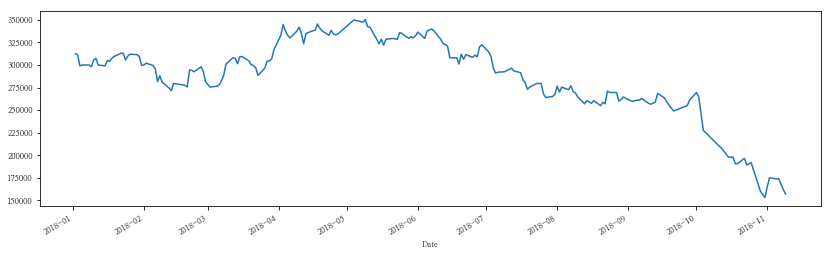

In [11]:
df['아모레퍼시픽'].plot()

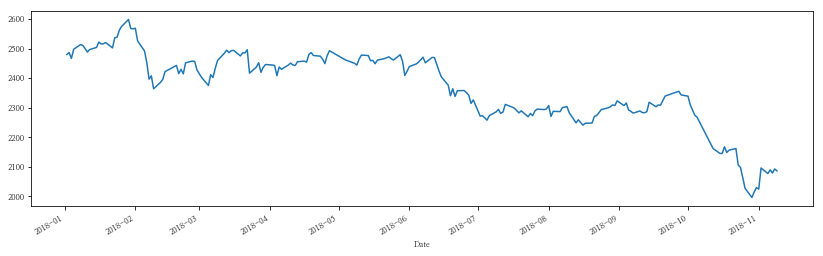

In [12]:
df['코스피'].plot()

# 전일 대비 등락률 
* df_pct_chg = df.pct_change()
* df_log_ret = np.log(df) - np.log(df.shift(1))

In [13]:
changes = df.pct_change()
changes.head()

,코스피,삼성전자,SK하이닉스,현대차,한국전력,아모레퍼시픽,제일모직,삼성전자우,삼성생명,NAVER,현대모비스
Date,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.002702,0.011760,0.014360,0.006689,-0.005298,-0.003200,-0.007843,-0.003338,0.000000,-0.015819,-0.001946
2018-01-04,-0.008000,-0.010461,-0.007722,-0.026578,-0.009321,-0.040128,0.011858,0.000000,-0.016327,0.025258,-0.038986
2018-01-05,0.012593,0.020360,0.028534,0.017065,0.000000,0.003344,0.015625,0.011005,0.008299,0.016797,0.000000
2018-01-08,0.006310,-0.001919,-0.013871,0.013423,0.002688,0.000000,0.007692,-0.004733,0.012346,0.046256,0.004057


In [14]:
import numpy as np

df_log_ret = np.log(df) - np.log(df.shift(1))
df_log_ret.head()

,코스피,삼성전자,SK하이닉스,현대차,한국전력,아모레퍼시픽,제일모직,삼성전자우,삼성생명,NAVER,현대모비스
Date,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.002698,0.011691,0.014258,0.006667,-0.005312,-0.003205,-0.007874,-0.003344,0.000000,-0.015946,-0.001947
2018-01-04,-0.008032,-0.010516,-0.007752,-0.026938,-0.009365,-0.040956,0.011788,0.000000,-0.016461,0.024945,-0.039767
2018-01-05,0.012514,0.020156,0.028135,0.016921,0.000000,0.003339,0.015504,0.010945,0.008265,0.016658,0.000000
2018-01-08,0.006290,-0.001920,-0.013968,0.013334,0.002685,0.000000,0.007663,-0.004744,0.012270,0.045218,0.004049


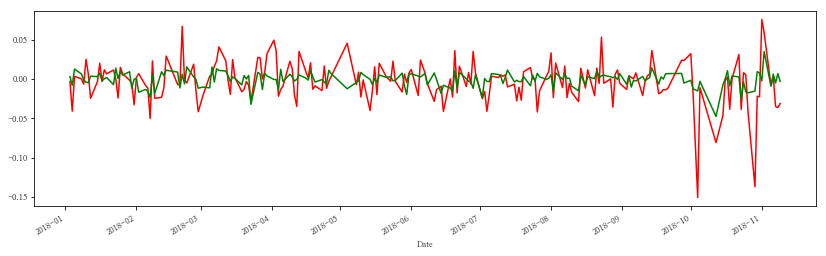

In [15]:
df_log_ret['아모레퍼시픽'].plot(color='r')
df_log_ret['코스피'].plot(color='g')
plt.show()

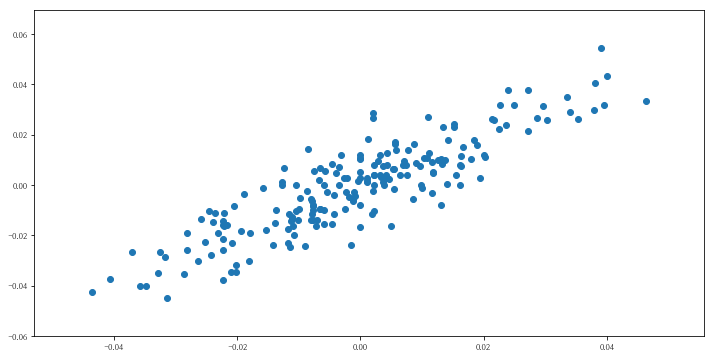

In [16]:
x = df_log_ret['삼성전자']
y = df_log_ret['삼성전자우']

plt.figure(figsize=(12,6))
plt.scatter(x, y)

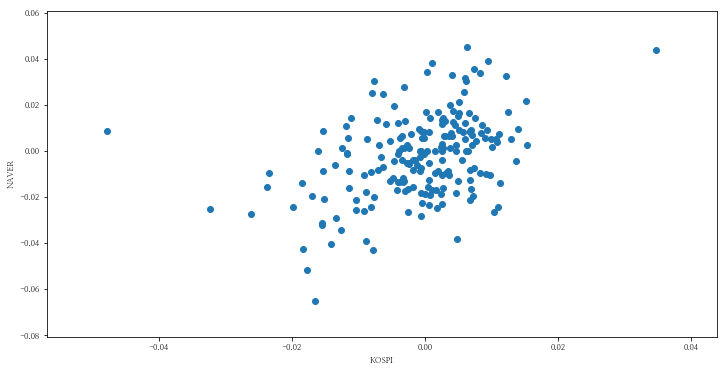

In [17]:
plt.figure(figsize=(12,6))
plt.xlabel('KOSPI')
plt.ylabel('NAVER')

x = df_log_ret['코스피']
y = df_log_ret['NAVER']
                                                
plt.scatter(x, y)

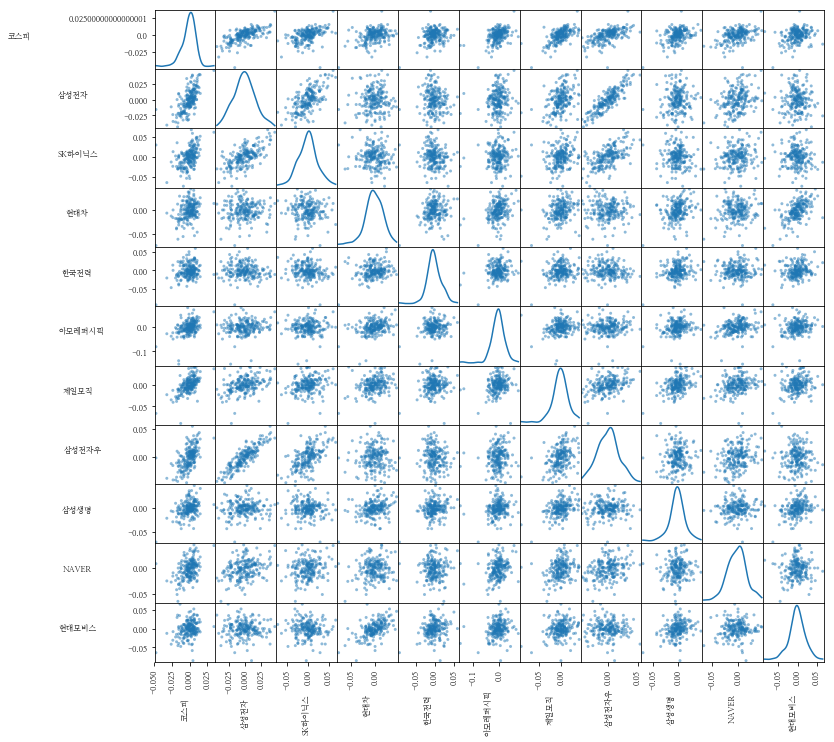

In [18]:
from pandas.plotting import scatter_matrix

axs = scatter_matrix(df_log_ret, diagonal='kde', figsize=(12, 12))
n = len(df_log_ret.columns)

for x in range(n):
    for y in range(n):
        ax = axs[x, y]
        ax.xaxis.label.set_rotation(90)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.labelpad = 50
        
plt.show()

# 종목간 상관관계

In [19]:
corr = changes.corr()
corr

,코스피,삼성전자,SK하이닉스,현대차,한국전력,아모레퍼시픽,제일모직,삼성전자우,삼성생명,NAVER,현대모비스
코스피,1.000000,0.655269,0.442575,0.361894,0.258365,0.447315,0.617355,0.571485,0.402109,0.411958,0.276387
삼성전자,0.655269,1.000000,0.647320,0.044195,-0.099793,0.136989,0.398236,0.878779,0.077393,0.310263,-0.009825
SK하이닉스,0.442575,0.647320,1.000000,-0.072678,-0.181089,0.062539,0.243571,0.593666,-0.068032,0.140622,-0.067729
현대차,0.361894,0.044195,-0.072678,1.000000,0.183744,0.320306,0.279133,0.013784,0.287446,0.121127,0.559726
한국전력,0.258365,-0.099793,-0.181089,0.183744,1.000000,0.168039,0.149615,-0.103350,0.231631,0.019645,0.216163
아모레퍼시픽,0.447315,0.136989,0.062539,0.320306,0.168039,1.000000,0.184098,0.080617,0.172400,0.230531,0.205548
제일모직,0.617355,0.398236,0.243571,0.279133,0.149615,0.184098,1.000000,0.384428,0.435666,0.276424,0.222257
삼성전자우,0.571485,0.878779,0.593666,0.013784,-0.103350,0.080617,0.384428,1.000000,0.086170,0.279135,-0.020513
삼성생명,0.402109,0.077393,-0.068032,0.287446,0.231631,0.172400,0.435666,0.086170,1.000000,0.074922,0.285352
NAVER,0.411958,0.310263,0.140622,0.121127,0.019645,0.230531,0.276424,0.279135,0.074922,1.000000,0.040884


# 상위 10개 종목 상관관계 히트맵

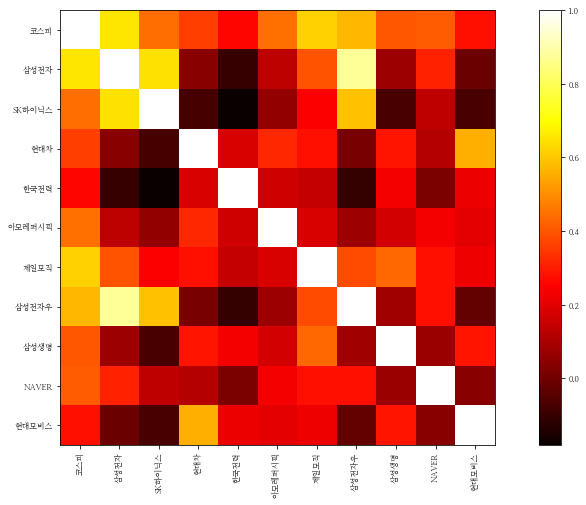

In [20]:
corr = changes.corr()
plt.figure(figsize=(16,8))
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

# 상관계수 순위 만들기

In [21]:
import pandas as pd

idx = []; vals = []
for ix, i in enumerate(corr.columns.values):
    for j in corr.columns.values[ix + 1:]:
        idx.append((i, j))
        vals.append(corr[i][j])

ser = pd.Series(data=vals, index=idx)
ser_ord = ser.sort_values(ascending=False)
ser_ord[:20]

(삼성전자, 삼성전자우)      0.878779
(코스피, 삼성전자)        0.655269
(삼성전자, SK하이닉스)     0.647320
(코스피, 제일모직)        0.617355
(SK하이닉스, 삼성전자우)    0.593666
(코스피, 삼성전자우)       0.571485
(현대차, 현대모비스)       0.559726
(코스피, 아모레퍼시픽)      0.447315
(코스피, SK하이닉스)      0.442575
(제일모직, 삼성생명)       0.435666
(코스피, NAVER)       0.411958
(코스피, 삼성생명)        0.402109
(삼성전자, 제일모직)       0.398236
(제일모직, 삼성전자우)      0.384428
(코스피, 현대차)         0.361894
(현대차, 아모레퍼시픽)      0.320306
(삼성전자, NAVER)      0.310263
(현대차, 삼성생명)        0.287446
(삼성생명, 현대모비스)      0.285352
(삼성전자우, NAVER)     0.279135
dtype: float64

# 종목간 상관 분석

In [22]:
import FinanceDataReader as fdr
import pandas as pd

tickers = [
    ('KS11','KOSPI'),
    ('005930','삼성전자'), 
    ('005380','현대차'),
    ('035420','네이버'), 
    ('006280','녹십자'), 
    ('012750','에스원'),
    ('003490','대한항공'),
    ('000210','대림산업'),
    ('004990','롯데제과'),
    ('192400','쿠쿠전자'),
    ('007310','오뚜기'), 
]

code_list = [tu[0] for tu in tickers]
df_list = [fdr.DataReader(code, '2018-01-01', '2018-12-31')['Close'] for code in code_list]

df = pd.concat(df_list, axis=1)
df = df.dropna()
df.columns = [tu[1] for tu in tickers]
df.head()

,KOSPI,삼성전자,현대차,네이버,녹십자,에스원,대한항공,대림산업,롯데제과,쿠쿠전자,오뚜기
Date,,,,,,,,,,,
2018-01-11,2487.91,48240.0,155000.0,183400.0,217000.0,101000.0,35950.0,86200.0,68400.0,104500.0,783000.0
2018-01-12,2496.42,48200.0,154000.0,181800.0,228000.0,101000.0,36750.0,85400.0,67200.0,99200.0,778000.0
2018-01-15,2503.73,48540.0,155000.0,184200.0,234000.0,101000.0,37600.0,86200.0,67100.0,101000.0,778000.0
2018-01-16,2521.74,50000.0,158000.0,180600.0,229000.0,101500.0,37350.0,84000.0,66700.0,98200.0,791000.0
2018-01-17,2515.43,49620.0,157500.0,177600.0,221000.0,102000.0,37450.0,84400.0,68300.0,95500.0,778000.0


In [23]:
chg = df.pct_change()
chg_corr = chg.corr()
chg_corr

,KOSPI,삼성전자,현대차,네이버,녹십자,에스원,대한항공,대림산업,롯데제과,쿠쿠전자,오뚜기
KOSPI,1.000000,0.659472,0.355642,0.415396,0.438547,0.162079,0.525636,0.413191,0.312722,0.176660,0.367840
삼성전자,0.659472,1.000000,0.050235,0.317895,0.122934,-0.044956,0.159718,0.049992,0.014307,0.023455,0.030920
현대차,0.355642,0.050235,1.000000,0.127701,0.157293,0.173267,0.173192,0.261399,0.110786,0.192705,0.287219
네이버,0.415396,0.317895,0.127701,1.000000,0.241951,0.163455,0.243242,0.118268,0.122227,0.045593,0.161242
녹십자,0.438547,0.122934,0.157293,0.241951,1.000000,0.005181,0.311546,0.219630,0.113322,0.186931,0.123233
에스원,0.162079,-0.044956,0.173267,0.163455,0.005181,1.000000,0.206716,0.167492,0.193152,0.023454,0.217136
대한항공,0.525636,0.159718,0.173192,0.243242,0.311546,0.206716,1.000000,0.284819,0.301274,0.018574,0.314296
대림산업,0.413191,0.049992,0.261399,0.118268,0.219630,0.167492,0.284819,1.000000,0.181273,0.124895,0.159415
롯데제과,0.312722,0.014307,0.110786,0.122227,0.113322,0.193152,0.301274,0.181273,1.000000,0.072625,0.227312
쿠쿠전자,0.176660,0.023455,0.192705,0.045593,0.186931,0.023454,0.018574,0.124895,0.072625,1.000000,0.096012


# 종목간 상관계수 소트

In [24]:
ser = chg_corr['KOSPI']
ser_ord = ser.sort_values(ascending=False)
ser_ord[1:]

삼성전자    0.659472
대한항공    0.525636
녹십자     0.438547
네이버     0.415396
대림산업    0.413191
오뚜기     0.367840
현대차     0.355642
롯데제과    0.312722
쿠쿠전자    0.176660
에스원     0.162079
Name: KOSPI, dtype: float64

# KOSPI 와 다른 종목간 상관계수
상관계수를 크기순으로 정렬하기(TOP-N 구하기)

In [25]:
ser = chg_corr['KOSPI']
ser_ord = ser.sort_values(ascending=False)
ser_ord[1:]

삼성전자    0.659472
대한항공    0.525636
녹십자     0.438547
네이버     0.415396
대림산업    0.413191
오뚜기     0.367840
현대차     0.355642
롯데제과    0.312722
쿠쿠전자    0.176660
에스원     0.162079
Name: KOSPI, dtype: float64

# 수익과 위험
* 수익 (returns): 수익률 평균 (mean)
* 위험 (risk): 표준편차 (std), 값이 클수록 변동성이 크므로 위험이 크다

In [26]:
tickers = [
    ('KS11','KOSPI'),
    ('005930','삼성전자'),
    ('005380','현대차'),
    ('012330','현대모비스'), 
    ('005490','포스코'),
    ('000660','SK하이닉스'),
    ('035420','Naver'),
    ('005935','삼성전자우'), 
    ('000270','기아자동차'),
    ('015760','한국전력'),
    ('090430','아모레퍼시픽'),
    ('032830','삼성생명'),
    ('006280','녹십자'),
    ('012750','에스원'),
    ('003490','대한항공'),
    ('000210','대림산업'),
    ('004990','롯데제과'),
    ('007310','오뚜기'),
]


code_list = [ticker[0] for ticker in tickers]
df_list = [fdr.DataReader(code, '2018-01-01', '2018-12-31')['Close'] for code in code_list]

df = pd.concat(df_list, axis=1)
df.columns = [ticker[1] for ticker in tickers]
df = df.dropna()
df.head(10)

,KOSPI,삼성전자,현대차,현대모비스,포스코,SK하이닉스,Naver,삼성전자우,기아자동차,한국전력,아모레퍼시픽,삼성생명,녹십자,에스원,대한항공,대림산업,롯데제과,오뚜기
Date,,,,,,,,,,,,,,,,,,
2018-01-02,2479.65,51020.0,149500.0,257000.0,339000.0,76600.0,177000.0,41940.0,32800.0,37750.0,312500.0,122500.0,227000.0,106500.0,35900.0,81800.0,65500.0,807000.0
2018-01-03,2486.35,51620.0,150500.0,256500.0,357500.0,77700.0,174200.0,41800.0,32600.0,37550.0,311500.0,122500.0,226000.0,102000.0,35750.0,81600.0,69400.0,800000.0
2018-01-04,2466.46,51080.0,146500.0,246500.0,367500.0,77100.0,178600.0,41800.0,31550.0,37200.0,299000.0,120500.0,209500.0,102000.0,34900.0,84700.0,71700.0,784000.0
2018-01-05,2497.52,52120.0,149000.0,246500.0,368000.0,79300.0,181600.0,42260.0,31950.0,37200.0,300000.0,121500.0,214500.0,104000.0,34900.0,84200.0,70000.0,792000.0
2018-01-08,2513.28,52020.0,151000.0,247500.0,369500.0,78200.0,190000.0,42060.0,32400.0,37300.0,300000.0,123000.0,211500.0,103000.0,36100.0,85000.0,68500.0,792000.0
2018-01-09,2510.23,50400.0,152500.0,249500.0,377500.0,76900.0,188800.0,40880.0,32500.0,37300.0,298000.0,126500.0,213000.0,102500.0,36300.0,85800.0,68200.0,788000.0
2018-01-10,2499.75,48840.0,155500.0,255000.0,372500.0,72900.0,185600.0,39080.0,33050.0,37400.0,305500.0,125000.0,214500.0,102000.0,35750.0,87200.0,68800.0,796000.0
2018-01-11,2487.91,48240.0,155000.0,251000.0,366500.0,72600.0,183400.0,39340.0,32500.0,36700.0,307500.0,124000.0,217000.0,101000.0,35950.0,86200.0,68400.0,783000.0
2018-01-12,2496.42,48200.0,154000.0,247500.0,386500.0,74400.0,181800.0,39160.0,32100.0,36450.0,300000.0,124500.0,228000.0,101000.0,36750.0,85400.0,67200.0,778000.0


In [27]:
changes = df.pct_change()
changes.head()

,KOSPI,삼성전자,현대차,현대모비스,포스코,SK하이닉스,Naver,삼성전자우,기아자동차,한국전력,아모레퍼시픽,삼성생명,녹십자,에스원,대한항공,대림산업,롯데제과,오뚜기
Date,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.002702,0.011760,0.006689,-0.001946,0.054572,0.014360,-0.015819,-0.003338,-0.006098,-0.005298,-0.003200,0.000000,-0.004405,-0.042254,-0.004178,-0.002445,0.059542,-0.008674
2018-01-04,-0.008000,-0.010461,-0.026578,-0.038986,0.027972,-0.007722,0.025258,0.000000,-0.032209,-0.009321,-0.040128,-0.016327,-0.073009,0.000000,-0.023776,0.037990,0.033141,-0.020000
2018-01-05,0.012593,0.020360,0.017065,0.000000,0.001361,0.028534,0.016797,0.011005,0.012678,0.000000,0.003344,0.008299,0.023866,0.019608,0.000000,-0.005903,-0.023710,0.010204
2018-01-08,0.006310,-0.001919,0.013423,0.004057,0.004076,-0.013871,0.046256,-0.004733,0.014085,0.002688,0.000000,0.012346,-0.013986,-0.009615,0.034384,0.009501,-0.021429,0.000000


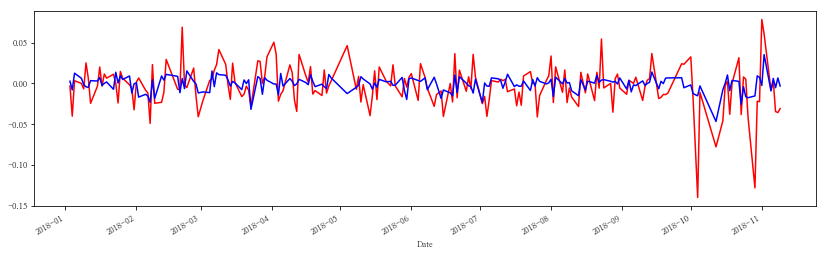

In [28]:
changes['아모레퍼시픽'].plot(color='r')
changes['KOSPI'].plot(color='b')

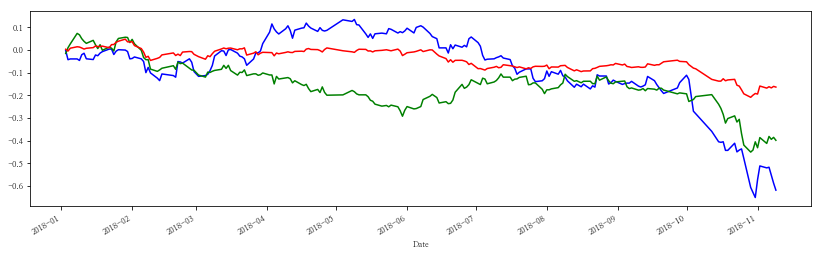

In [29]:
changes['아모레퍼시픽'].cumsum().plot(color='b')
changes['Naver'].cumsum().plot(color='g')
changes['KOSPI'].cumsum().plot(color='r')

# 스캐터 차트, 수익과 위험 분석
scatter 차트로 수익과 위험의 상대적인 비교를 쉽게 할 수 있다.
* 수익 (returns): 수익률 평균 (mean)
* 위험 (risk): 표준편차 (std)


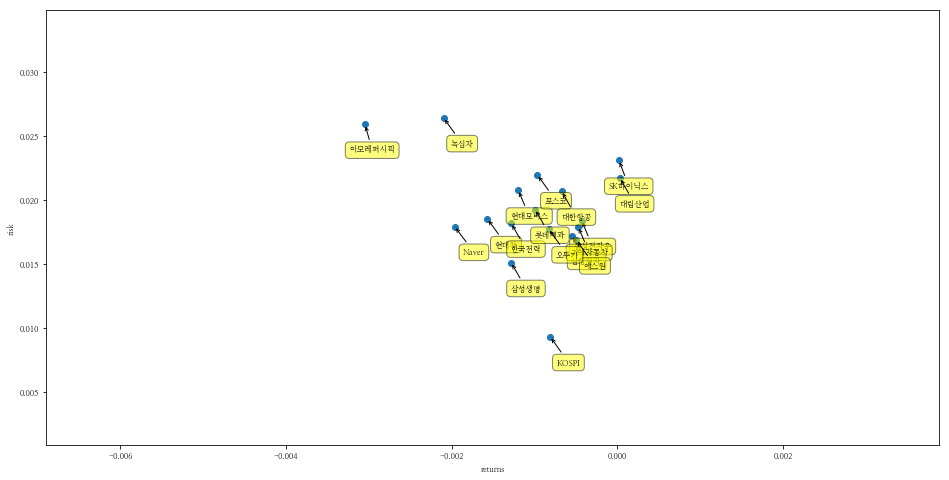

In [30]:
plt.figure(figsize=(16,8))
plt.scatter(changes.mean(), changes.std())
plt.xlabel('returns')
plt.ylabel('risk')
for label, x, y in zip(changes.columns, changes.mean(), changes.std()):
    plt.annotate( label, xy=(x, y), xytext=(30, -30),
    textcoords = 'offset points',
    ha = 'right', va = 'bottom',
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))    

# 리뷰
* 공분산, 상관계수, 베타
* 종목코드, 종목명 다루기
* 전일대비등락률:  df.pct_change()
* scatter_matrix, df.corr()
* 상관계수 순위 만들기
* 수익과 위험 분석

#### 2017, 2018 [FinanceData](FinanceData)